# Código para calcular indice de vegetação NDVI do município de *Astorga*, Paraná.

## Manipulando archivo vectorial (Shapefile)

In [15]:
# Para leer un shapefile, es necesário importar una libreria llamada geopandas.

#GeoPandas es un proyecto de código abierto para facilitar el trabajo con datos geoespaciales en python.
#GeoPandas amplía los tipos de datos utilizados por pandas para permitir operaciones espaciales en tipos geométricos.
#Las operaciones geométricas son realizadas por shapely . Geopandas depende además de fiona para el acceso a los archivos y 
#de matplotlib para el trazado.

import geopandas as gpd


In [71]:
# Para comenzar, indicamos la ruta del archivo shapefile del município de Astorga
#copiamos toda la ruta, con los slash en la direccion "/"
ruta_shp = ("C:/Users/lopez/OneDrive/Escritorio/Vida Academica/PSOT_PROJETO_FINAL/Astorga_shp/Astorga_shp.shp")


In [70]:
shapefile = gpd.read_file(ruta_shp)

#para mostrar tabla de atributos, simplemente digitamos el nombre de nuestra variable
shapefile

,id,nome,uf,populacao,pib,estado_id,codigo_ibg,Area,Area_H,geometry
0,3218,Astorga,PR,24698,323469,18,4102109,434.256,43426,"POLYGON ((-51.65059 -23.08463, -51.64658 -23.0..."


<AxesSubplot: >

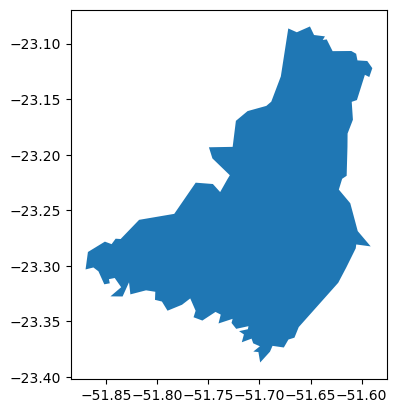

In [69]:
# Para ver el shapefile, utilizamos la funcion plot

shapefile.plot()

In [68]:
# es importante saber o sistema de referencia de coordenadas (SRC) de nuestro shapefile
#En este ejemplo, el shapefile está en coordenadas geográficas, que es un sistema adecuado para grandes áreas, 
#que ocupan mas de una zona UTM. Nuestro shapefile se encaja en la zona UTM 22s, entonces se tendrá que reproyectar
shapefile.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [67]:
# Reproyectando capa shapefile

shp_reprojetado = shapefile.to_crs(epsg = 31982 )
shp_reprojetado.crs

<Derived Projected CRS: EPSG:31982>
Name: SIRGAS 2000 / UTM zone 22S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 54°W and 48°W, northern and southern hemispheres, onshore and offshore. In remainder of South America - between 54°W and 48°W, southern hemisphere, onshore and offshore.
- bounds: (-54.0, -54.18, -47.99, 7.04)
Coordinate Operation:
- name: UTM zone 22S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [87]:
# Comprobando...
shp_reprojetado.crs

shp_reprojetado.to_file("C:/Users/lopez/OneDrive/Escritorio/Vida Academica/PSOT_PROJETO_FINAL/Raster_londrina_astorga sem recortar/GRANULE/L2A_T22KDV_A037544_20220830T133159/IMG_DATA/R10m_Reprojetado/shp_reprojetado.shp")
##perfecto!

## Manipulando la imagen de satélite (Raster)

In [3]:
# Para la manipulación de archivos matriciales, usamos la biblioteca Rasterio, con sus muchas bibliotecas auxiliares..

import rasterio as rio

#Para generar gráficos o plots, utilizamos la biblioteca matplotlib
import matplotlib.pyplot as plt

#Para ver la imagen utilizamos show
from rasterio.plot import show

In [146]:
# Como lo hicimos con el shapefile, usamos dos variables para especificar la ruta de nuestras imagenes.
#Como el objetivo de este tutorial es el cálculo de NDVI, solamente exportamos las bandas RED y NIR

ruta_red =("C:/Users/lopez/OneDrive/Escritorio/Vida Academica/PSOT_PROJETO_FINAL/Raster_londrina_astorga sem recortar/GRANULE/L2A_T22KDV_A037544_20220830T133159/IMG_DATA/R10m/T22KDV_20220830T133201_B04_10m.jp2")
ruta_nir =("C:/Users/lopez/OneDrive/Escritorio/Vida Academica/PSOT_PROJETO_FINAL/Raster_londrina_astorga sem recortar/GRANULE/L2A_T22KDV_A037544_20220830T133159/IMG_DATA/R10m/T22KDV_20220830T133201_B08_10m.jp2")

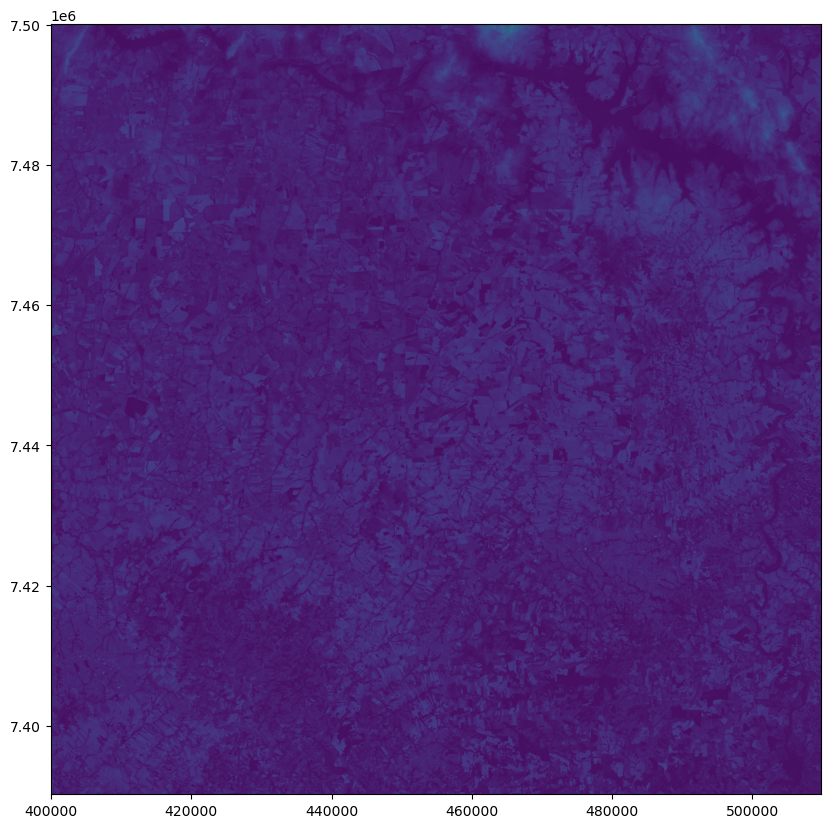

In [147]:
#para abrir un raster, utilizamos rasterio como rio.open(ruta)
red = rio.open(ruta_red)
fig, ax = plt.subplots(figsize=(12,10))
show(red, ax=ax)
plt.show()

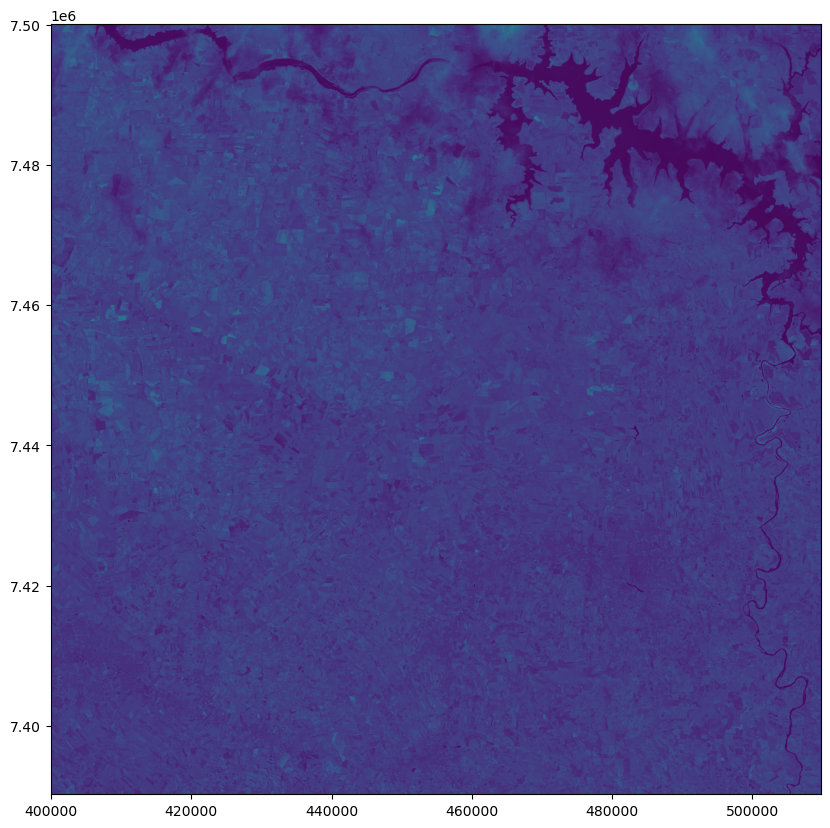

In [148]:
#para abrir un raster, utilizamos rasterio como rio.open(ruta)
nir = rio.open(ruta_nir)
fig, ax = plt.subplots(figsize=(12,10))
show(nir, ax=ax)
plt.show()

In [149]:
#Es importante que el raster y el shapefile se encuentren en el mismo CRS, para eso, verificamos el sistema de coordenadas
#de nuestra imagen de satélite

red.crs

#Vemos que no está en el mismo crs. Si bien los dos están en la zona UTM 22S, el sistema del raster es 
#en coordenadas geográficas, ya el de nuestro shapefile está en coordenadas metricas o proyectadas.

CRS.from_epsg(32722)

In [150]:
# Para reproyectar nuestro raster, es necesário hacer lo siguiente:
#importar la sub-biblioteca de rasterio.warp
from rasterio.warp import calculate_default_transform, reproject, Resampling

In [165]:
#recordamos el camino de nuestro raster

ruta_red =("C:/Users/lopez/OneDrive/Escritorio/Vida Academica/PSOT_PROJETO_FINAL/Raster_londrina_astorga sem recortar/GRANULE/L2A_T22KDV_A037544_20220830T133159/IMG_DATA/R10m/T22KDV_20220830T133201_B04_10m.jp2")
#Crear variable con el nuevo CRS

dst_crs = "EPSG:31982"

#Crear una ruta de salida

ruta_salida = ("C:/Users/lopez/OneDrive/Escritorio/Vida Academica/PSOT_PROJETO_FINAL/Raster_londrina_astorga sem recortar/GRANULE/L2A_T22KDV_A037544_20220830T133159/IMG_DATA/R10m_Reprojetado/red_reprojetado_True3.tif")

#transform: de filas y columnas a x e y.


with rio.open(ruta_red) as src:
    
    transform, width, height = calculate_default_transform(src.crs, dst_crs, src.width, src.height, *src.bounds)
    
    #Copiando el meta del raster original
    kwargs = src.meta.copy()

    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rio.open(ruta_salida, 'w', **kwargs) as dst: 
            for i in range(1, src.count + 1):
                reproject(
                source=rio.band(src, i),
                destination=rio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)   

with rio.open(ruta_salida) as red_utm: # cambiar el nombre del archivo en todas las lineas
    boundary = red_utm.bounds
    img = red_utm.read()
    nodata = red_utm.nodata
    

    
red_utm.crs

CRS.from_epsg(31982)

In [162]:
ruta_nir =("C:/Users/lopez/OneDrive/Escritorio/Vida Academica/PSOT_PROJETO_FINAL/Raster_londrina_astorga sem recortar/GRANULE/L2A_T22KDV_A037544_20220830T133159/IMG_DATA/R10m/T22KDV_20220830T133201_B08_10m.jp2")
#Crear variable con el nuevo CRS

dst_crs = "EPSG:31982"

#Crear una ruta de salida

ruta_salida1 = ("C:/Users/lopez/OneDrive/Escritorio/Vida Academica/PSOT_PROJETO_FINAL/Raster_londrina_astorga sem recortar/GRANULE/L2A_T22KDV_A037544_20220830T133159/IMG_DATA/R10m_Reprojetado/nir_reprojetado_True3.tif")


# Usamos rasterio para abrir y proyectar el raster

with rio.open(ruta_nir) as src:
    
    transform, width, height = calculate_default_transform(
        src.crs #crs antigua
        , dst_crs #crs nueva
        , src.width, src.height, *src.bounds)
    
#O **kwargs possibilita verificarmos os parâmetros nomeados da função, isto é, aqueles parâmetros que são passados com um nome!

#Eles estarão disponíveis como um dicionário ({'chave': 'valor'}) dentro da função.

    kwargs = src.meta.copy()
    
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })
    

# Usar rasterio para escribir el nuevo raster proyectado
# El código usa un loop para tener en cuenta los raster multibanda
    
    with rio.open(ruta_salida1, 'w', **kwargs) as dst: 
        for i in range(1, src.count + 1):
            reproject(
            source=rio.band(src, i),
            destination=rio.band(dst, i),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs=dst_crs,
            resampling=Resampling.nearest)
            

with rio.open(ruta_salida1) as nir_utm: # cambiar el nombre del archivo en todas las lineas
    boundary = nir_utm.bounds
    img = nir_utm.read()
    nodata = nir_utm.nodata
    

nir_utm.crs

CRS.from_epsg(31982)

In [166]:
### Chamando os rasters reprojetados:

ruta_red_reprojetado = ("C:/Users/lopez/OneDrive/Escritorio/Vida Academica/PSOT_PROJETO_FINAL/Raster_londrina_astorga sem recortar/GRANULE/L2A_T22KDV_A037544_20220830T133159/IMG_DATA/R10m_Reprojetado/red_reprojetado_True3.tif")
ruta_nir_reprojetado = ("C:/Users/lopez/OneDrive/Escritorio/Vida Academica/PSOT_PROJETO_FINAL/Raster_londrina_astorga sem recortar/GRANULE/L2A_T22KDV_A037544_20220830T133159/IMG_DATA/R10m_Reprojetado/nir_reprojetado_True3.tif")

In [167]:
#comprobando que se reproyectó correctamente
red_re = rio.open(ruta_red_reprojetado)
nir_re = rio.open(ruta_nir_reprojetado)
print(red_re.crs)
print(nir_re.crs)

#perfecto!!!!!!

EPSG:31982
EPSG:31982


In [168]:
import rasterio
from rasterio import mask
import matplotlib.pyplot as plt
from rasterio.plot import show

In [169]:
ruta_red_reprojetado = ("C:/Users/lopez/OneDrive/Escritorio/Vida Academica/PSOT_PROJETO_FINAL/Raster_londrina_astorga sem recortar/GRANULE/L2A_T22KDV_A037544_20220830T133159/IMG_DATA/R10m_Reprojetado/red_reprojetado_True3.tif")
ruta_nir_reprojetado = ("C:/Users/lopez/OneDrive/Escritorio/Vida Academica/PSOT_PROJETO_FINAL/Raster_londrina_astorga sem recortar/GRANULE/L2A_T22KDV_A037544_20220830T133159/IMG_DATA/R10m_Reprojetado/nir_reprojetado_True3.tif")
shp=gpd.read_file("C:/Users/lopez/OneDrive/Escritorio/Vida Academica/PSOT_PROJETO_FINAL/Raster_londrina_astorga sem recortar/GRANULE/L2A_T22KDV_A037544_20220830T133159/IMG_DATA/R10m_Reprojetado/shp_reprojetado.shp").geometry


In [170]:
#Banda RED
# cortar red band

with rasterio.open(ruta_red_reprojetado) as src1:
     img1, transform = rasterio.mask.mask(src1, shp, crop=True) # ae es el nombre del poligono que usaremos para cortar
     meta1 = src1.meta.copy()
    
# actualizar la metadata de la imagen cortada
meta1.update({"driver": "GTiff",
             "height": img1.shape[1],
             "width": img1.shape[2],
             "transform": transform})
#guardar imagen cortada

with rasterio.open("C:/Users/lopez/OneDrive/Escritorio/Vida Academica/PSOT_PROJETO_FINAL/Raster_londrina_astorga sem recortar/GRANULE/L2A_T22KDV_A037544_20220830T133159/IMG_DATA/R10m_Reprojetado/red_crop_True3.tif","w", **meta) as dst:
    dst.write(img1)
    

In [171]:
#Banda NIR
# cortar red band

with rasterio.open(ruta_nir_reprojetado) as src:
     img, transform = rasterio.mask.mask(src, shp, crop=True) # ae es el nombre del poligono que usaremos para cortar
     meta = src.meta.copy()
    
# actualizar la metadata de la imagen cortada
meta.update({"driver": "GTiff",
             "height": img.shape[1],
             "width": img.shape[2],
             "transform": transform})
#guardar imagen cortada

with rasterio.open("C:/Users/lopez/OneDrive/Escritorio/Vida Academica/PSOT_PROJETO_FINAL/Raster_londrina_astorga sem recortar/GRANULE/L2A_T22KDV_A037544_20220830T133159/IMG_DATA/R10m_Reprojetado/nir_crop_True3.tif","w", **meta) as dst:
    dst.write(img)
    

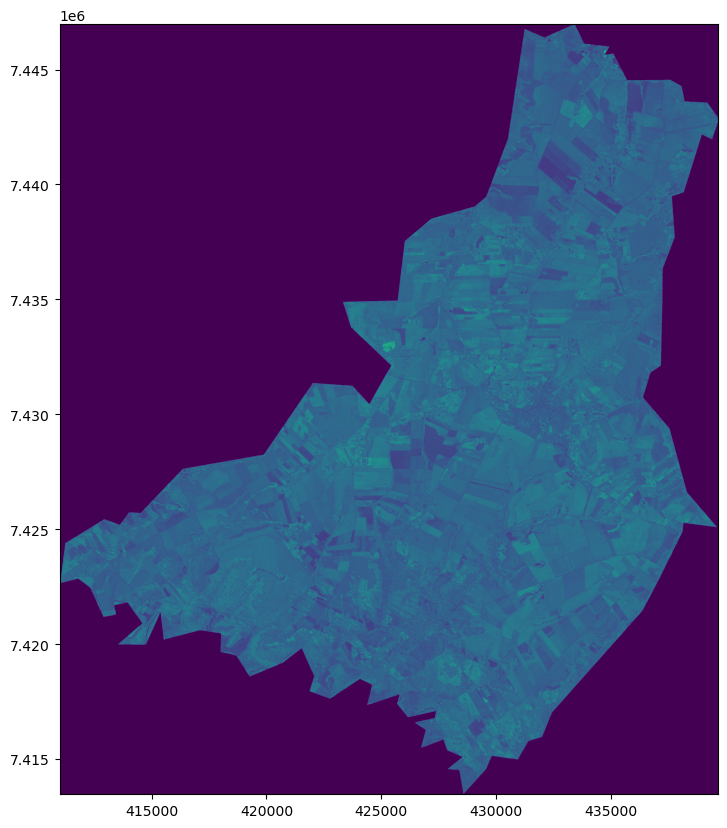

In [172]:
### Comprobando si se efectuó el corte
nir_img = rasterio.open("C:/Users/lopez/OneDrive/Escritorio/Vida Academica/PSOT_PROJETO_FINAL/Raster_londrina_astorga sem recortar/GRANULE/L2A_T22KDV_A037544_20220830T133159/IMG_DATA/R10m_Reprojetado/nir_crop_True3.tif")
fig, ax = plt.subplots(figsize=(12,10))
show(nir_img, ax=ax)
plt.show()

# Calculando el NDVI

In [173]:
from rasterio.plot import show

import matplotlib.pyplot as plt

import numpy as np

from osgeo import gdal

import rasterio

In [174]:
#Abrir las dos imagenes recortadas como Array(en el final de la ruta esta el comando para convertir e array)
nir_img = gdal.Open("C:/Users/lopez/OneDrive/Escritorio/Vida Academica/PSOT_PROJETO_FINAL/Raster_londrina_astorga sem recortar/GRANULE/L2A_T22KDV_A037544_20220830T133159/IMG_DATA/R10m_Reprojetado/nir_crop_True3.tif").ReadAsArray()
red_img = gdal.Open("C:/Users/lopez/OneDrive/Escritorio/Vida Academica/PSOT_PROJETO_FINAL/Raster_londrina_astorga sem recortar/GRANULE/L2A_T22KDV_A037544_20220830T133159/IMG_DATA/R10m_Reprojetado/red_crop_True3.tif").ReadAsArray()

In [175]:
#Las imagenes S2 vienen con un factor de escala donde sus valores están elevados a 10.000, por eso la división entre 10k
#para que los resultados estén entre 1 y 0.
red_img = red_img/10000

nir_img = nir_img/10000

C:\Users\lopez\AppData\Local\Temp\ipykernel_10368\440604028.py:1: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir_img - red_img)/(nir_img + red_img)


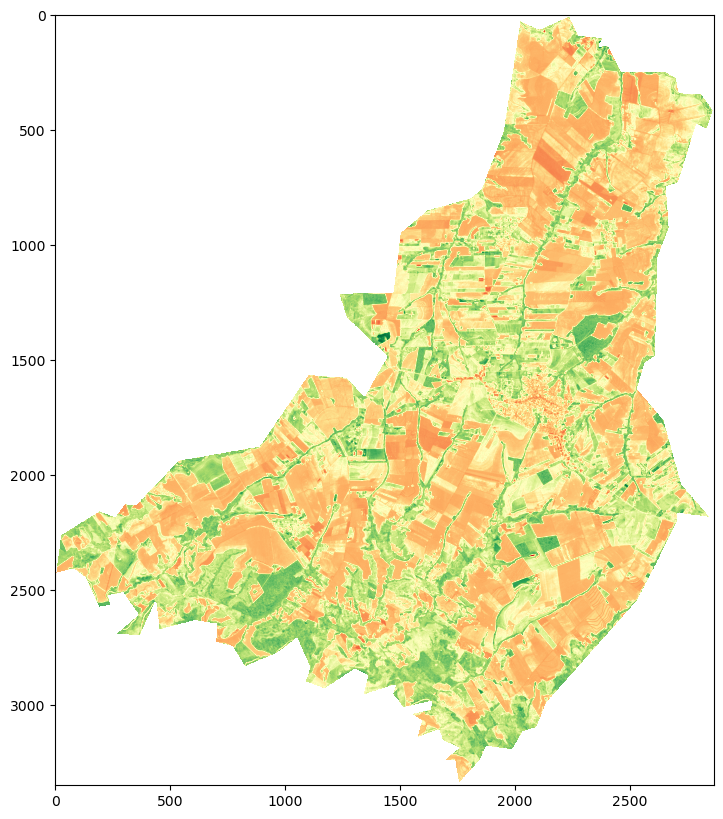

In [176]:
ndvi = (nir_img - red_img)/(nir_img + red_img)

fig, ax = plt.subplots(figsize=(12,10))
show(ndvi,cmap="RdYlGn", ax=ax)
plt.show()

## Trabajo Concluido!!!!!!